In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
data=pd.read_csv('SPAM text.csv')

In [20]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

<AxesSubplot:xlabel='Category', ylabel='count'>

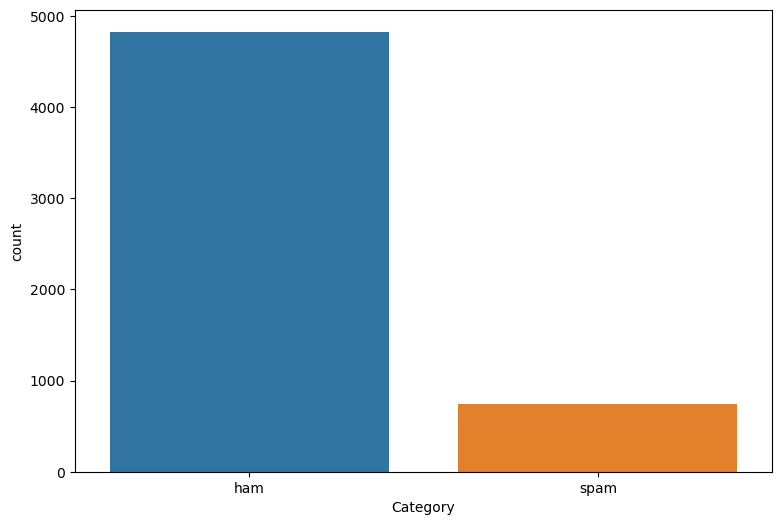

In [30]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.countplot(data['Category'])

In [23]:
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']

In [24]:
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)

In [25]:
print(ham_msg.shape,spam_msg.shape)

(747, 2) (747, 2)


Text(0.5, 0, 'Message types')

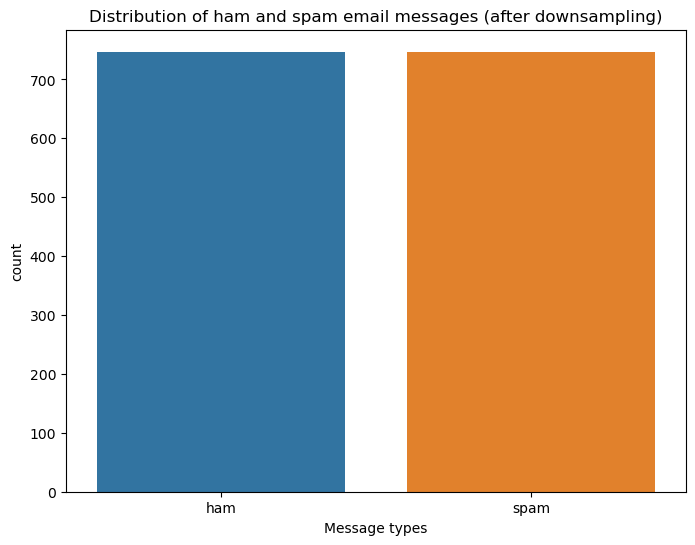

In [28]:
balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.Category)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [31]:
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [32]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})

In [33]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=434)

In [34]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [36]:
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [37]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [38]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [43]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [40]:
model =tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [41]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [44]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)

Epoch 1/30
38/38 - 3s - loss: 0.6874 - accuracy: 0.7163 - val_loss: 0.6789 - val_accuracy: 0.8629 - 3s/epoch - 75ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6677 - accuracy: 0.8301 - val_loss: 0.6472 - val_accuracy: 0.8796 - 87ms/epoch - 2ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6213 - accuracy: 0.8661 - val_loss: 0.5835 - val_accuracy: 0.8829 - 93ms/epoch - 2ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5499 - accuracy: 0.8653 - val_loss: 0.4944 - val_accuracy: 0.8930 - 98ms/epoch - 3ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4508 - accuracy: 0.8845 - val_loss: 0.4017 - val_accuracy: 0.8930 - 85ms/epoch - 2ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3747 - accuracy: 0.8929 - val_loss: 0.3276 - val_accuracy: 0.9097 - 83ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.3039 - accuracy: 0.9180 - val_loss: 0.2739 - val_accuracy: 0.9097 - 86ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2690 - accuracy: 0.9205 - val_loss: 0.2339 - val_accuracy: 0.9264 - 84ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s - l

In [46]:
model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9799


[0.07566994428634644, 0.9799330830574036]

Text(0.5, 0, 'epoch')

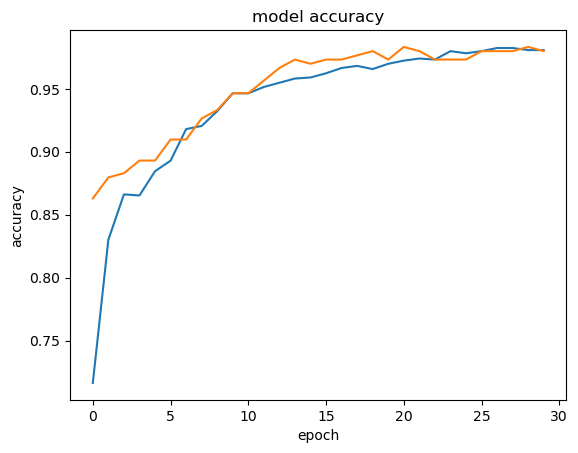

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [48]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [49]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 121ms/step


array([[0.00834826],
       [0.01798376],
       [0.9999263 ]], dtype=float32)